### Running Logistic Regression analysis on the Kickstarter data ###

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve


plt.style.use('ggplot')

In [12]:
kickstarter = pd.read_csv('kickstarter_04_25_19_ready_for_modeling.csv')

In [13]:
kickstarter.columns

Index(['id', 'slug', 'state_successful', 'goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater', 'location', 'child_category'],
      dtype='object')

In [14]:
X = kickstarter[['goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater']]
y = kickstarter['state_successful']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 101, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(144934, 19) (144934,)
(62115, 19) (62115,)


In [16]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
from sklearn.dummy import DummyClassifier

In [27]:
clf = DummyClassifier(random_state=101)
clf.fit(X_train_scaled, y_train)
DummyClassifier(constant=None, random_state=101)
clf.score(X_test_scaled, y_test) 

0.5025034210738147

In [9]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
param_grid = dict(C=C, penalty=penalty)

logistic = LogisticRegression()
logistic_grid = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
logistic_grid.fit(X_train_scaled, y_train)
grid_predictions = logistic_grid.predict(X_test_scaled)
best_params = logistic_grid.best_params_
best_estimator = logistic_grid.best_estimator_
best_cm = confusion_matrix(y_test,grid_predictions)
best_cr = classification_report(y_test,grid_predictions)
print(best_params, best_estimator, best_cm, best_cr)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   38.2s finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 464.15888336127773, 'penalty': 'l1'} LogisticRegression(C=464.15888336127773, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False) [[16928 11551]
 [ 7832 25804]]               precision    recall  f1-score   support

           0       0.68      0.59      0.64     28479
           1       0.69      0.77      0.73     33636

   micro avg       0.69      0.69      0.69     62115
   macro avg       0.69      0.68      0.68     62115
weighted avg       0.69      0.69      0.69     62115



In [75]:
#model = LogisticRegression()
#param_grid = [{'penalty': ['l1','l2'],'C': [0.001,0.01,0.1,1,10,100,1000]}]
#grid = GridSearchCV(model,param_grid,refit=True,verbose=2, scoring='roc_auc', n_jobs=-1)
#grid.fit(X_train_scaled,y_train)
#grid_predictions = grid.predict(X_test_scaled)
#best_params = grid.best_params_
#best_estimator = grid.best_estimator_
#best_cm = confusion_matrix(y_test,grid_predictions)
#best_cr = classification_report(y_test,grid_predictions)
#print(best_params, best_estimator, best_cm, best_cr)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   16.6s finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 1000, 'penalty': 'l1'} LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) [[16928 11551]
 [ 7832 25804]]               precision    recall  f1-score   support

           0       0.68      0.59      0.64     28479
           1       0.69      0.77      0.73     33636

   micro avg       0.69      0.69      0.69     62115
   macro avg       0.69      0.68      0.68     62115
weighted avg       0.69      0.69      0.69     62115



In [28]:
print('Best ROC_AUC for logit: %.3f', logistic_grid.best_score_)

Best ROC_AUC for logit: %.3f 0.7537643601164997


In [29]:
logistic_grid.best_estimator_.coef_

array([[-6.04178676,  0.72728944, -0.24844185, -0.03579002,  0.14076681,
         0.19692005, -0.1287482 ,  0.09241086,  0.10382167, -0.01008717,
         0.16643422, -0.13977567,  0.14507815, -0.25462885,  0.24388741,
        -0.03524681,  0.19790692, -0.24498046,  0.2270824 ]])

In [21]:
log_model = LogisticRegression(C=1000, fit_intercept = True)
log_model.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
predictions = log_model.predict(X_test_scaled)

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.59      0.64     28479
           1       0.69      0.77      0.73     33636

   micro avg       0.69      0.69      0.69     62115
   macro avg       0.69      0.68      0.68     62115
weighted avg       0.69      0.69      0.69     62115



In [25]:
log_loss(y_test,predictions)

10.779093831874265

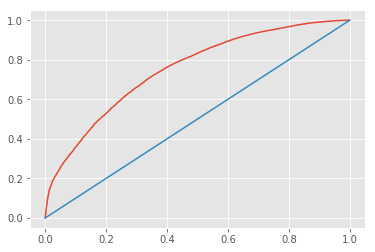

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_scores)
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))

In [84]:
print("Model accuracy:",metrics.accuracy_score(y_test,predictions))

Model accuracy: 0.6879497705868147


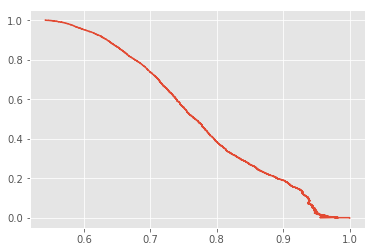

In [38]:
prec, recall, thresholds = precision_recall_curve(y_test,y_scores)
plt.plot(prec[0:-1], recall[0:-1])

In [31]:
from sklearn.metrics import roc_curve, auc

0.7514505230252904


No handles with labels found to put in legend.


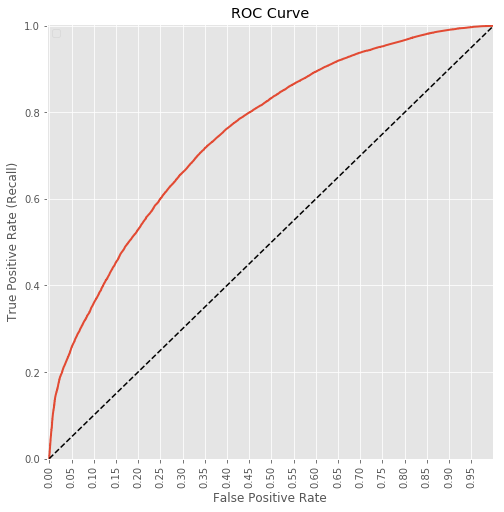

In [37]:
y_scores = logistic_grid.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plt.figure(figsize=(8,8))
plt.title('ROC Curve')
plt.plot(fpr, tpr, linewidth=2,)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.005, 1, 0, 1.005])
plt.xticks(np.arange(0,1, 0.05), rotation=90)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc='best')

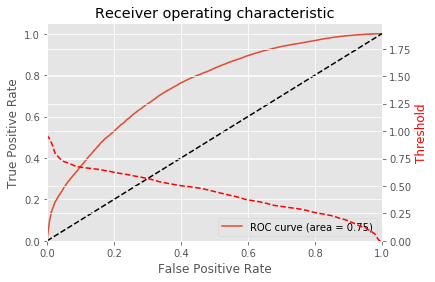

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr) # compute area under the curve
 
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
 
# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]])

plt.show()
#plt.savefig('roc_and_threshold.png')
#plt.close()